In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

In [3]:
SMALL_SIZE = 7
MEDIUM_SIZE = 8
BIGGER_SIZE = 10

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['pdf.use14corefonts'] = True

despine_offset = 10
despine_trim = True

### Load the table that shows the PERT cell cycle fractions vs the reported doubling times and scRNA cell cycle fractions

In [4]:
df = pd.read_csv('scdna_replication_paper/analysis/gastric_10x_500kb/sample_cell_cycle_counts.csv.gz')
df.head()

,dna_num_cells_s,dna_num_cells_g1,dna_frac_s,dna_frac_g1,cell_line,pert_g1g2_pct,pert_s_pct,doubling_time,dna_g0g1_pct,rna_g0g1_pct
0,309,587,0.344866,0.655134,HGC-27,65.513393,34.486607,17.046980,62.989011,28.307692
1,183,769,0.192227,0.807773,NCI-N87,80.777311,19.222689,46.935123,73.670330,71.824176
2,69,1149,0.056650,0.943350,SNU-668,94.334975,5.665025,73.959732,81.450549,71.692308


In [9]:
# create a list of y-axis columns to plot against 'pert_g1g2_pct'
x_cols = ['doubling_time', 'rna_g0g1_pct', 'rna_g0g1_pct']
x_labels = ['Doubling time (h)', 'Andor scRNA G0/G1%', 'Andor scRNA G0/G1%']
y_cols = ['pert_g1g2_pct', 'pert_g1g2_pct', 'doubling_time']
y_labels = ['PERT scWGS G1/2%', 'PERT scWGS G1/2%', 'Doubling time (h)']


def plot_pert_vs_andor_gastric_samples(df, x_cols, x_labels, y_cols, y_labels, ax):
    # plot the data
    i = 0
    for x_col, y_col in zip(x_cols, y_cols):
        # compute correlation coefficient between current x and y axes
        y = df[y_col]
        x = df[x_col]
        slope, intercept, r_value, p_value, std_err = linregress(x, y)
        # fit a regression line to the data but don't plot the points
        sns.regplot(y=y_col, x=x_col, data=df, ax=ax[i], scatter=False, color='black', line_kws={'alpha': 0.5}, ci=None)
        # plot the points colored by cell line
        sns.scatterplot(y=y_col, x=x_col, data=df, hue='cell_line', ax=ax[i])
        # adjust legend and axis labels
        ax[i].set_ylabel(y_labels[i])
        ax[i].set_xlabel(x_labels[i])
        # ax[i].legend(title='cell line')
        # report the correlation coefficient and p-value in the bottom right corner of the subplot
        ax[i].text(0.95, 0.05, 'r={:.2f}, p={:.2e}'.format(r_value, p_value), transform=ax[i].transAxes, horizontalalignment='right', verticalalignment='bottom')
        # set the x-axis limits to be 5% wider than the data
        left_lim = max(df[x_col].min() - 5, 0)
        right_lim = min(df[x_col].max() + 5, 100)
        ax[i].set_xlim(left=left_lim, right=right_lim)
        sns.despine(ax=ax[i], offset=despine_offset, trim=despine_trim)
        i += 1
    
    ax[0].legend(title='cell line', loc='upper left', frameon=False)
    ax[1].legend().remove()
    ax[2].legend().remove()

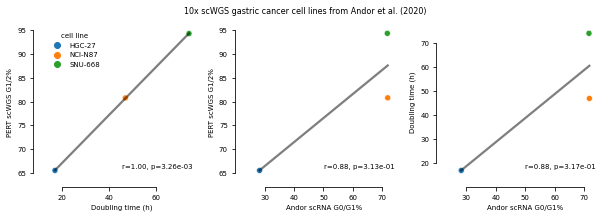

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(8.5, 3), tight_layout=True)

plot_pert_vs_andor_gastric_samples(df, x_cols, x_labels, y_cols, y_labels, ax)

fig.suptitle('10x scWGS gastric cancer cell lines from Andor et al. (2020)', fontsize=8)

fig.savefig('scdna_replication_paper/manuscript/extended_data_figs/figED8.pdf', dpi=300, bbox_inches='tight')

plt.show()